In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import joblib as jl
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D
from matplotlib import cm, colors

In [3]:
data=pd.read_hdf('../data/FigureS9.h5')

Text(0, 0.5, 'Loss')

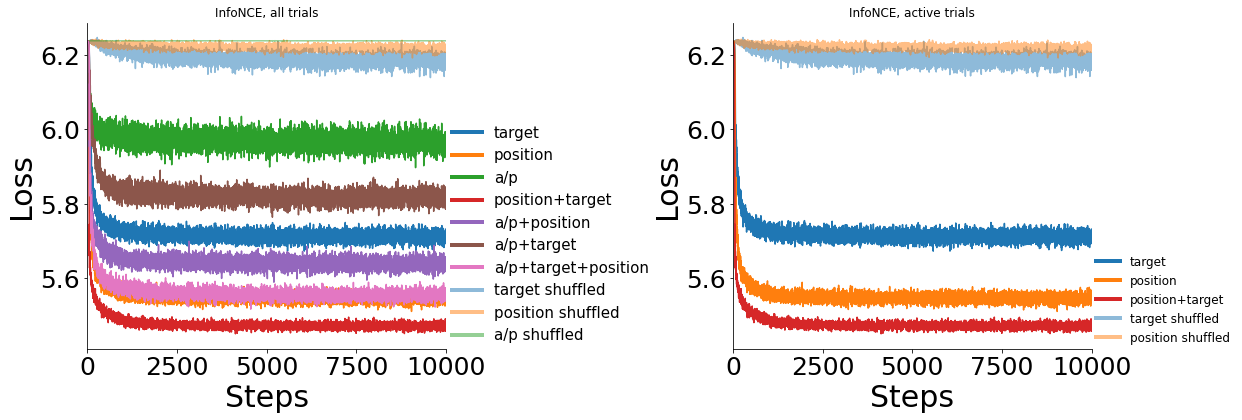

In [4]:


fig=plt.figure(figsize=(18,6))
plt.subplots_adjust(wspace=0.8)

all_loss_data = data['all_trial_loss']
all_ap=all_loss_data['ap']
all_pos=all_loss_data['pos']
all_target = all_loss_data['target']
all_postarget = all_loss_data['pos_target']
all_appos = all_loss_data['ap_pos']
all_aptarget = all_loss_data['ap_target']
all_appostarget = all_loss_data['ap_pos_target']

all_ap_sh=all_loss_data['ap_shuffle']
all_pos_sh=all_loss_data['pos_shuffle']
all_target_sh =all_loss_data['target_shuffle']

ax1=fig.add_subplot(121)
ax1.set_title('InfoNCE, all trials')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

w=9
p=7


ax1.plot(scipy.signal.savgol_filter(all_target,w,p), label = 'target')
ax1.plot(scipy.signal.savgol_filter(all_pos,w,p), label = 'position', )
ax1.plot(scipy.signal.savgol_filter(all_ap,w,p), label = 'a/p')

ax1.plot(scipy.signal.savgol_filter(all_target_sh,w,p), label = 'target shuffled', c = plt.cm.tab10(0), alpha = 0.5)
ax1.plot(scipy.signal.savgol_filter(all_pos_sh,w,p), label = 'position shuffled', c = plt.cm.tab10(1), alpha =0.5)
ax1.plot(scipy.signal.savgol_filter(all_ap_sh,w,p), label = 'a/p shuffled',c = plt.cm.tab10(2), alpha = 0.5)

ax1.plot(scipy.signal.savgol_filter(all_postarget,w,p), label = 'pos+target')
ax1.plot(scipy.signal.savgol_filter(all_appos,w,p), label = 'ap+pos')
ax1.plot(scipy.signal.savgol_filter(all_aptarget,w,p), label = 'ap+target')
ax1.plot(scipy.signal.savgol_filter(all_appostarget,w,p), label = 'ap+pos+target')

plt.xlim([0,10000])
plt.xlabel('Steps', fontsize=30)
plt.xticks(np.linspace(0,10000, 5),fontsize=25)
plt.yticks(np.linspace(6.2, 5.6,4),fontsize=25)
plt.ylabel('Loss', fontsize=30)



custom_lines = [Line2D([0], [0], lw=4, c=plt.cm.tab10(0)),
                    Line2D([0], [0], lw=4, c=plt.cm.tab10(1)),
                    Line2D([0], [0],  lw=4,c=plt.cm.tab10(2)),
                    Line2D([0], [0],  lw=4, c=plt.cm.tab10(3)),
                Line2D([0], [0],lw=4, c=plt.cm.tab10(4)),
                Line2D([0], [0],  lw=4, c=plt.cm.tab10(5)),
                Line2D([0], [0], lw=4, c=plt.cm.tab10(6)),
                      Line2D([0], [0], lw=4, c=plt.cm.tab10(0), alpha =0.5),
                    Line2D([0], [0], lw=4, c=plt.cm.tab10(1), alpha= 0.5),
                    Line2D([0], [0],  lw=4,c=plt.cm.tab10(2), alpha =0.5)
                   ]
ax1.legend(custom_lines, ['target', 'position' , 'a/p', 'position+target', 'a/p+position', 'a/p+target', 'a/p+target+position',
                         'target shuffled', 'position shuffled', 'a/p shuffled'], 
           loc=(1.0,0), frameon = False, 
              fontsize=15)


ax2=fig.add_subplot(122)
ax2.set_title('InfoNCE, active trials')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

active_loss_data = data['active_trial_loss']
active_pos=active_loss_data['pos']
active_target = active_loss_data['target']
active_postarget = active_loss_data['pos_target']

active_pos_sh=active_loss_data['pos_shuffle']
active_target_sh = active_loss_data['target_shuffle']

c_id = np.linspace(50, 250, 7, dtype = int)

ax2.plot(scipy.signal.savgol_filter(active_target,w,p), label = 'target', c = plt.cm.tab10(0))

ax2.plot(scipy.signal.savgol_filter(active_target_sh,w,p), label = 'target-shuffled', c = plt.cm.tab10(0), alpha = 0.5)

ax2.plot(scipy.signal.savgol_filter(active_pos,w,p), label = 'position', c = plt.cm.tab10(1))
ax2.plot(scipy.signal.savgol_filter(active_pos_sh,w,p), label = 'position-shuffled', c = plt.cm.tab10(1), alpha = 0.5)
ax2.plot(scipy.signal.savgol_filter(active_postarget,w,p), label = 'position+target', c = plt.cm.tab10(3))


plt.legend(fontsize='large', loc = [1,0])
plt.xlim([0,10000])
plt.xlabel('Steps', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Loss', fontsize=30)

custom_lines = [Line2D([0], [0], lw=4, c=plt.cm.tab10(0)),
                    Line2D([0], [0], lw=4, c=plt.cm.tab10(1)),
                    Line2D([0], [0],  lw=4, c=plt.cm.tab10(3)),
                Line2D([0], [0], lw=4, c=plt.cm.tab10(0), alpha = 0.5),
                    Line2D([0], [0], lw=4, c=plt.cm.tab10(1), alpha = 0.5),
                   ]
ax2.legend(custom_lines, ['target', 'position' , 'position+target', 'target shuffled', 'position shuffled'], 
           loc=(1,0), frameon = False, 
              fontsize='12')

plt.xlim([0,10000])
plt.xlabel('Steps', fontsize=30)
plt.xticks(np.linspace(0,10000, 5),fontsize=25)
plt.yticks(np.linspace(6.2, 5.6,4),fontsize=25)
plt.ylabel('Loss', fontsize=30)


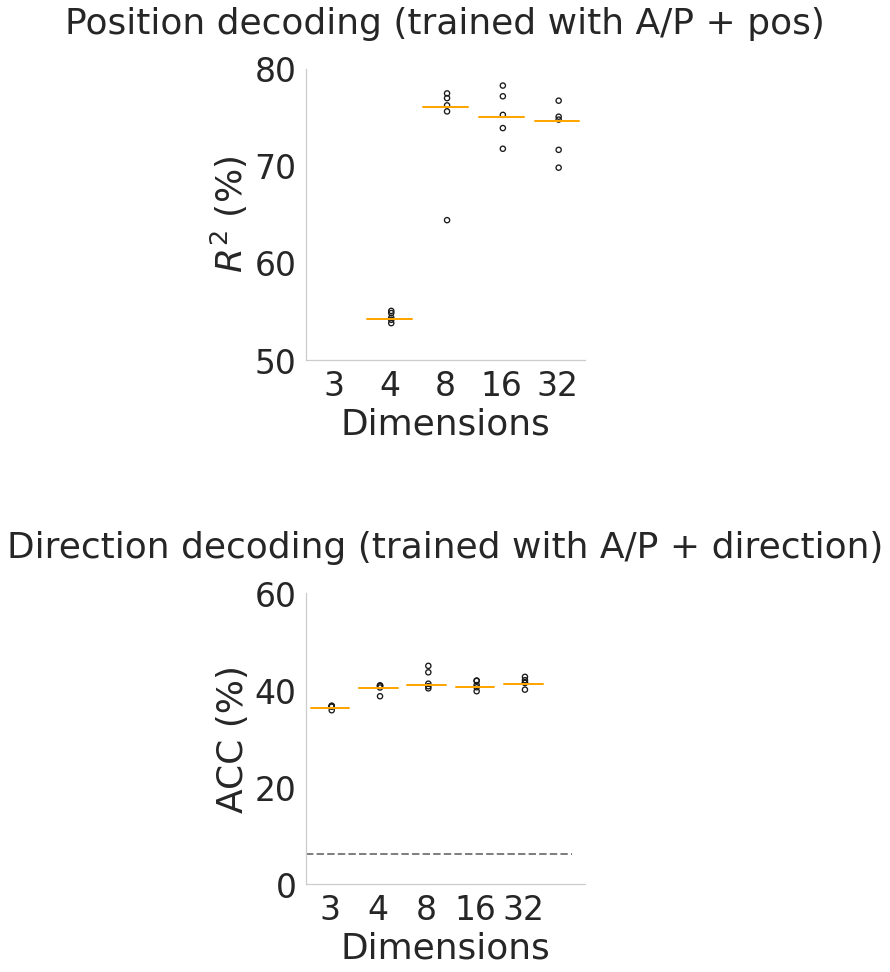

In [5]:
## All trials
ap_position_acc = data['ap_position_dim_decoding']
ap_direction_acc = data['ap_direction_dim_decoding']

sns.set( font_scale = 3)
sns.set_style("whitegrid", {'axes.grid' : False},)
fig = plt.figure(figsize = (5,15))
axs = fig.subplots(2,1)
plt.subplots_adjust(hspace = 0.8)
data_list = [ap_position_acc, ap_direction_acc]
title_list = ['Position decoding (trained with A/P + pos)','Direction decoding (trained with A/P + direction)']

chance=1/16
units = ['$R^2$ (%)', 'ACC (%)' ]
ylims = [(50,80), (0,60)]
for i in range(2):
    m =0
    ax=sns.stripplot(data = data_list[i][['3', '4', '8', '16', '32']], facecolor='none', color = 'k', marker="$\circ$", s=10, jitter=0, ax=axs[i])

    sns.boxplot(showmeans=False,
            medianprops={'color': 'orange', 'ls': '-', 'lw': 2},
            whiskerprops={'visible': False},
            zorder=10,
            data=data_list[i][['3', '4', '8', '16', '32']],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=axs[i])
    if i != 0:
        axs[i].plot([-0.5,5],[chance*100, chance*100], lw=2, ls='dashed', c='gray')
    
    ax.set_xlabel('Dimensions')
    ax.set_ylim(ylims[i])
    ax.set_ylabel(units[i])
    ax.set_title(title_list[i], y=1.1)
    ax.set_xticks(ticks = np.arange(5))
    ax.set_xticklabels(labels= [3,4,8,16,32])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.show()

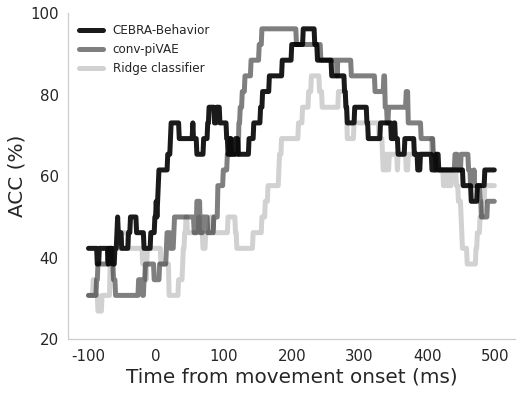

In [6]:
results = data['direction_decoding']
cebra_acc_time = results['cebra']
pivae_acc_time = results['pivae']
ridge_acc_time = results['ridge']

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)
ax.plot(cebra_acc_time, label = 'CEBRA-Behavior', color = 'k', lw=5)
ax.plot(pivae_acc_time, label = 'conv-piVAE', color = 'black', alpha = 0.5, lw = 5)
ax.plot(ridge_acc_time, label = 'Ridge classifier', color = 'k', alpha = 0.2, lw=5)
#ax.plot(vel/vel.max()*100, label = 'hand speed')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon = False, fontsize=12)
plt.ylabel('ACC (%)', fontsize=20)
plt.yticks(np.linspace(20,100, 5), fontsize=15)
plt.xlabel('Time from movement onset (ms)', fontsize=20)
plt.xticks(np.linspace(0, 600,7, dtype = int) ,np.linspace(-100, 500, 7, dtype = int), fontsize=15)
plt.show()